In [30]:
import owlready2 as owlr
import pandas as pd
from rdflib import URIRef, Literal, Graph
from rdflib.namespace import RDF, RDFS
from rdflib import Namespace
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph

from collections import Counter
import uuid

from datetime import datetime, timezone

import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot
from IPython.core.display import HTML

def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()

    display(Image(png))

def t2rdflibg(triples): #triples to rdflib graph
    g = Graph()
    for t in triples:
        g.add(t)
    return g

import networkx as nx


In [2]:
data_rows = [{ "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "PersonID", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "FirstName", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "FamilyName", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "DateOfBirth", 
             "DataType" : "date"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "DateOfDeath", 
             "DataType" : "date"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Address Line 1", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Address Line 2", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Address Line 3", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Postal Code", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Country", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Country", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Product", 
             "Attribute" : "Coverage Type", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Policy", 
             "Attribute" : "Policy ID", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Policy", 
             "Attribute" : "Start Date", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Policy", 
             "Attribute" : "End Date", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Policy", 
             "Context" : "Policy Types"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Context" : "All Types",
             "SubContext" : "Policy Types"},
             
            ]

pd.DataFrame(data_rows)

,Business Domain,Model,ModelType,Entity,Attribute,DataType,Context,SubContext
0,Core,Principal Interactions,Conceptual,Person,PersonID,string,NaN,NaN
1,Core,Principal Interactions,Conceptual,Person,FirstName,string,NaN,NaN
2,Core,Principal Interactions,Conceptual,Person,FamilyName,string,NaN,NaN
3,Core,Principal Interactions,Conceptual,Person,DateOfBirth,date,NaN,NaN
4,Core,Principal Interactions,Conceptual,Person,DateOfDeath,date,NaN,NaN
5,Core,Principal Interactions,Conceptual,Address,Address Line 1,string,NaN,NaN
6,Core,Principal Interactions,Conceptual,Address,Address Line 2,string,NaN,NaN
7,Core,Principal Interactions,Conceptual,Address,Address Line 3,string,NaN,NaN
8,Core,Principal Interactions,Conceptual,Address,Postal Code,string,NaN,NaN
9,Core,Principal Interactions,Conceptual,Address,Country,string,NaN,NaN


In [3]:
onto = owlr.get_ontology("datamodels_rdf.owl").load()

* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Contains belongs to more than one entity types: [owl.ObjectProperty, owl.ObjectProperty, owl.ObjectProperty, datamodels_rdf.MetaProperty]; I'm trying to fix it...
* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#MemberOf belongs to more than one entity types: [owl.ObjectProperty, owl.ObjectProperty, owl.ObjectProperty, datamodels_rdf.MetaProperty]; I'm trying to fix it...
* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#FromAttribute belongs to more than one entity types: [owl.ObjectProperty, datamodels_rdf.MetaClass, datamodels_rdf.RelationshipLinkage]; I'm trying to fix it...
* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#FromClass belongs to more than one entity types: [owl.ObjectProperty, datamodels_rdf.MetaClass, datamodels_rdf.Relationsh

In [4]:
def flush(onto):
    for m in onto.Serialization.instances()[0].Contains:
        print(m, m.is_a)
flush(onto)
owlr.sync_reasoner(onto)

* Owlready2 * Running HermiT...
    java -Xmx2000M -cp /usr/local/python/py36/lib/python3.6/site-packages/owlready2/hermit:/usr/local/python/py36/lib/python3.6/site-packages/owlready2/hermit/HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:////var/folders/rd/q3bhk6_n56x75m05pp2sq7dr0000gn/T/tmpn43rd672


datamodels_rdf.Mapping_Attribute [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_AttributeHasDataType [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_Class [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ClassContainsAttribute [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_Context [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ContextContainsClass [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ContextContainsSubContext [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_DomainContainsModel [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_Model [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ModelContainsClass [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ModelContainsContext [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ModelDomain [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ModelHasModelType [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_SubContext [datamodels_rdf.Mapping]


* Owlready2 * HermiT took 0.6618449687957764 seconds
* Owlready * Reparenting datamodels_rdf.FactPredicate: {owl.ObjectProperty, datamodels_rdf.Contains} => {datamodels_rdf.Contains}
* Owlready * Reparenting datamodels_rdf.FactObject: {owl.ObjectProperty, datamodels_rdf.Contains} => {datamodels_rdf.Contains}
* Owlready * Reparenting datamodels_rdf.FactSubject: {owl.ObjectProperty, datamodels_rdf.Contains} => {datamodels_rdf.Contains}
* Owlready * Reparenting datamodels_rdf.ToClass: {datamodels_rdf.RelationshipLinkage, owl.ObjectProperty} => {datamodels_rdf.MetaClass, datamodels_rdf.RelationshipLinkage}
* Owlready * Reparenting datamodels_rdf.ToAttribute: {datamodels_rdf.RelationshipLinkage, owl.ObjectProperty} => {datamodels_rdf.MetaClass, datamodels_rdf.RelationshipLinkage}
* Owlready * Reparenting datamodels_rdf.FromOptionality: {datamodels_rdf.RelationshipLinkage, owl.ObjectProperty} => {datamodels_rdf.RelationshipLinkage}
* Owlready * Reparenting datamodels_rdf.FromClass: {datamode

In [5]:
# Collect mappings from a given serializatin
def get_contents_matching_subclass(s, subclass):    
    m_list = []
    if not isinstance(subclass, list):
        subclass = [subclass]
    for m in s.Contains:
        if any([(c in subclass or x in subclass) for c in m.is_a for x in m.is_a.first().is_a]):
            m_list.append(m)
    return m_list

def get_schema_labels(s):
    labels=[]
    for m in get_contents_matching_subclass(s,[onto.EntityMapping]):
        print(m)
        if len(m.SerializationLabel)>0:
            labels.extend(m.SerializationLabel)
    
    for m in get_contents_matching_subclass(s,[onto.DataPropertyMapping]):
        print(m)
        if len(m.MappingRange)>0:
            labels.extend(m.MappingRange)
    
    return labels

In [6]:
get_schema_labels(onto.EntityAttributeRecord)

datamodels_rdf.Mapping_Attribute
datamodels_rdf.Mapping_Class
datamodels_rdf.Mapping_Context
datamodels_rdf.Mapping_Model
datamodels_rdf.Mapping_ModelDomain
datamodels_rdf.Mapping_SubContext
datamodels_rdf.Mapping_AttributeHasDataType
datamodels_rdf.Mapping_ModelHasModelType


['Attribute',
 'Class',
 'Context',
 'Model',
 'ModelDomain',
 'SubContext',
 'DataType',
 'ModelType']

In [7]:
list(data_rows[0].keys())

['Business Domain', 'Model', 'ModelType', 'Entity', 'Attribute', 'DataType']

In [8]:
serial_key = { "Business Domain" : "ModelDomain", 
             "Model" : "Model", 
             "ModelType" : "ModelType", 
             "Entity" : "Class", 
             "Attribute" : "Attribute", 
             "DataType" : "DataType", 
             "Context" : "Context", 
             "SubContext" : "SubContext"}



In [9]:
entities = get_contents_matching_subclass(onto.EntityAttributeRecord, onto.EntityMapping)
data_properties = get_contents_matching_subclass(onto.EntityAttributeRecord, onto.DataPropertyMapping)
properties = get_contents_matching_subclass(onto.EntityAttributeRecord, onto.PropertyMapping)



In [10]:
get_contents_matching_subclass(onto.EntityAttributeRecord, onto.Mapping)



[datamodels_rdf.Mapping_Attribute,
 datamodels_rdf.Mapping_AttributeHasDataType,
 datamodels_rdf.Mapping_Class,
 datamodels_rdf.Mapping_ClassContainsAttribute,
 datamodels_rdf.Mapping_Context,
 datamodels_rdf.Mapping_ContextContainsClass,
 datamodels_rdf.Mapping_ContextContainsSubContext,
 datamodels_rdf.Mapping_DomainContainsModel,
 datamodels_rdf.Mapping_Model,
 datamodels_rdf.Mapping_ModelContainsClass,
 datamodels_rdf.Mapping_ModelContainsContext,
 datamodels_rdf.Mapping_ModelDomain,
 datamodels_rdf.Mapping_ModelHasModelType,
 datamodels_rdf.Mapping_SubContext]

In [11]:
onto.EntityMapping.is_a

[datamodels_rdf.Mapping]

In [12]:
entities[0].__class__, entities[0].is_a

(datamodels_rdf.EntityMapping, [datamodels_rdf.EntityMapping])

In [13]:
entities[0].is_instance_of

[datamodels_rdf.EntityMapping]

In [14]:
data_rows[0][entities[0].SerializationLabel.first()]

'PersonID'

In [15]:
data_rows[0]

def remap(d, mapper):
    return {v:d.get(k) for k,v in mapper.items()}
    
        

In [16]:
entities

[datamodels_rdf.Mapping_Attribute,
 datamodels_rdf.Mapping_Class,
 datamodels_rdf.Mapping_Context,
 datamodels_rdf.Mapping_Model,
 datamodels_rdf.Mapping_ModelDomain,
 datamodels_rdf.Mapping_SubContext]

In [17]:
lineage_tree = {e.SerializationLabel.first():e.SerializationParentLabel.first() for e in entities}

def get_lineage(d, l, acc=None):
    if acc is None:
        if l is not None:
            acc=[l]
    q = d.get(l)
    if q is not None:
        acc.append(q)
        acc = get_lineage(d, q, acc)
    return acc
    


get_lineage(lineage_tree,'SubContext')



['SubContext', 'Model', 'ModelDomain']

In [38]:
namespace = onto.base_iri

def gen_batch_header(onto, namespace, name):
    bh_type = onto.BatchNode
    key = uuid.uuid4().hex
    now = datetime.now(timezone.utc).strftime("%Y-%M-%dT%H:%M:%S")
    subj = URIRef(key, namespace)
    props = { RDF.type : URIRef(bh_type.iri), 
              RDFS.label : Literal(name), 
              URIRef(onto.GeneratedOn.iri) : Literal(now) }
    triples=[]
    for k,v in props.items():
        triples.append((subj, k, v))
    return subj, triples

def gen_job_header(onto, batch_header_URI, namespace, serialization_name):
    jh_type = onto.JobNode
    key = uuid.uuid4().hex
    now = datetime.now(timezone.utc).strftime("%Y-%M-%dT%H:%M:%S")
    subj = URIRef(key, namespace)
    props = { URIRef(onto.MemberOf.iri) : batch_header_URI,
              RDF.type : URIRef(jh_type.iri), 
              RDFS.label : Literal(serialization_name), 
              URIRef(onto.GeneratedOn.iri) : Literal(now) }
    triples=[]
    for k,v in props.items():
        triples.append((subj, k, v))
    return subj, triples

def gen_row_header(onto, job_header_URI, namespace, serialization_name):
    rh_type = onto.RowNode
    key = uuid.uuid4().hex
    now = datetime.now(timezone.utc).strftime("%Y-%M-%dT%H:%M:%S")
    subj = URIRef(key, namespace)
    props = { URIRef(onto.MemberOf.iri) : job_header_URI,
              RDF.type : URIRef(rh_type.iri), 
              RDFS.label : Literal(serialization_name), 
              URIRef(onto.GeneratedOn.iri) : Literal(now) }
    triples=[]
    for k,v in props.items():
        triples.append((subj, k, v))
    return subj, triples


    
# Generate the s,p,o triples for a single row of data
# Additionally, link each triple component (s,p,o) to a unique row_id, to enable retrieval at row-level

def reify_triple(collection_node, triple):
    triples = []
    unique_id = URIRef(uuid.uuid4().hex, namespace)
    fact_object = (unique_id, RDF.type,URIRef(onto.FactNode.iri))
    fact_link = (unique_id, URIRef(onto.MemberOf.iri),collection_node)
    triples.append(fact_object)
    triples.append(fact_link)
    print(triple)
    s,p,o = triple
    triples.append((unique_id, URIRef(onto.FactSubject.iri),s))
    triples.append((unique_id, URIRef(onto.FactPredicate.iri),p))
    triples.append((unique_id, URIRef(onto.FactObject.iri),o))
    return triples

def gen_content(onto, row_header_URI, row, entities, properties, data_properties, lineage_tree, batch_catalog, namespace):
    triples = []
    top_level_objects = {}
    label_d = {}
    for e in entities:
        key = uuid.uuid4().hex
        subj = e.SerializationLabel.first()

        e_type = e.MappingMetaTarget.first()
        data = row.get(e.SerializationLabel.first())
        #print ( e, subj, data, e_type)
        if data is not None:
            if data not in batch_catalog:
                batch_catalog[data]=URIRef(key, namespace)
                label_d[subj]=URIRef(key, namespace)
            else:
                label_d[subj]=batch_catalog[data]

                
            subj=label_d[e.SerializationLabel.first()]
            props = { RDF.type : URIRef(e_type.iri),
                                  RDFS.label : Literal(data)}
            top_level_objects[data]=None

            for k,v in props.items():
                triples.append([subj, k, v])
            
    for d in data_properties:
        subj = label_d.get(d.MappingDomain.first())
        if subj is not None:
            prop = URIRef(d.MappingMetaTarget.first().iri)
            obj = Literal(row[d.MappingRange.first()])
            triples.append((subj, prop, obj))

    for p in properties:
        subj = label_d.get(p.MappingDomain.first())
        if subj is not None:
            prop = URIRef(p.MappingMetaTarget.first().iri)

    #        obj = Literal(row[p.MappingRange.first()])
            #print(p.MappingRange.first())
            obj = label_d.get(p.MappingRange.first())
            #print(subj,p, obj)
            if obj is not None:
                triples.append((subj, prop, obj))
    
    for e in entities:
        if row.get(e.SerializationLabel.first()) is not None:
            lineage = get_lineage(lineage_tree, e.SerializationLabel.first())
            lineage = ".".join([row.get(l) if row.get(l) is not None else "_" for l in lineage][::-1])
            
            #print("\t", e.MappingMetaTarget.first(), lineage)
            subj = label_d.get(e.SerializationLabel.first())
            if subj is not None:
                prop = URIRef(onto.UniqueIdentifier.iri)
                obj = Literal(lineage)
                triples.append((subj, prop, obj))
                top_level_objects[subj]=lineage
    return triples, batch_catalog

triples =  []
catalog = {}

batch_header_URI, header_triples = gen_batch_header(onto, onto.iri, "conceptual model data load")
triples.extend( header_triples )
job_header_URI, job_triples = gen_job_header(onto, batch_header_URI, onto.iri, "conceptual_entity_load")
triples.extend( job_triples )
reify_triples=[]

for e, row in enumerate(data_rows):
    row_header, row_h_triples = gen_row_header(onto, job_header_URI, onto.iri, f"data_row_{e}")
    triples.extend( row_h_triples )
    print(row)
    t, catalog = gen_content(onto, row_header, remap(row, serial_key), entities, properties, data_properties, lineage_tree,catalog, namespace)
    triples.extend( t )
    for individual in t:
        
        reify_triples.extend(reify_triple(row_header, individual))

# Reify triples to the Row_Node:
print (len(triples), len(reify_triples))

triples.extend(reify_triples)
    

{'Business Domain': 'Core', 'Model': 'Principal Interactions', 'ModelType': 'Conceptual', 'Entity': 'Person', 'Attribute': 'PersonID', 'DataType': 'string'}
[rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/d3ea552705f34f789477d9eec66f4147'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Attribute')]
[rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/d3ea552705f34f789477d9eec66f4147'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'), rdflib.term.Literal('PersonID')]
[rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/6dc866eb8fb641d8bce0aa1e055c6a5f'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Class')]
[rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/6dc866eb8fb641d8bce0aa1e055c

In [39]:
global_graph = Graph()

In [40]:
row_g = Graph()
row_g.parse ("datamodels_rdf.owl", format='xml')
dmns = Namespace(onto.base_iri)
row_g.bind('dm', dmns, override=True, replace=True)
row_g.bind('rdfs', RDFS)
namespace_d = {'dm': dmns, 'rdfs' : RDFS, 'rdf' : RDF}

view_g = Graph()

for e,t in enumerate(triples):
    try:
        row_g.add(t)
    except AssertionError as err: 
        print(e, t)
        print(err)
    view_g.add(t)
    
print(len(view_g))
#visualize(view_g)

1619


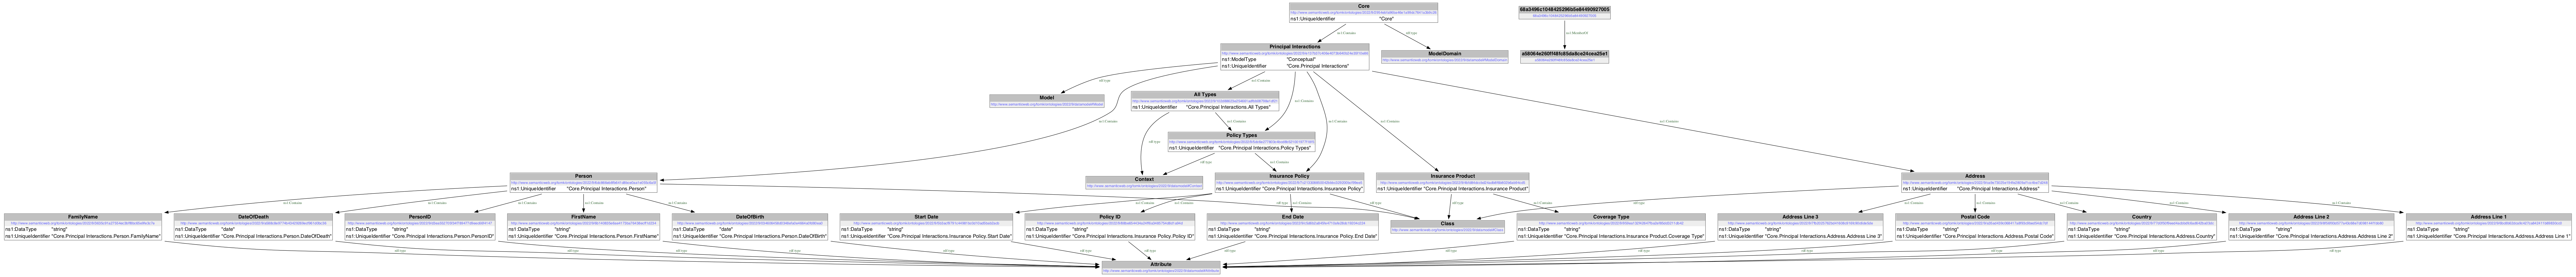

In [52]:
q = """
SELECT ?s ?p ?o
WHERE 

{
    {
        ?r dm:FactPredicate ?p .
        ?r dm:FactSubject ?s .
        ?r dm:FactObject ?o .
    }
    UNION
    {
        ?s a dm:BatchNode .
        ?s dm:Contains ?o .
        BIND (dm:Contains as ?p)
    }
    UNION
    {
        ?s a dm:BatchNode .
        BIND (dm:MemberOf as ?p)
        ?o ?p ?s .
    }
    
    
}
"""
#owlr.DeductiveClosure(onto).expand(row_g)
visualize(t2rdflibg(row_g.query(q)))

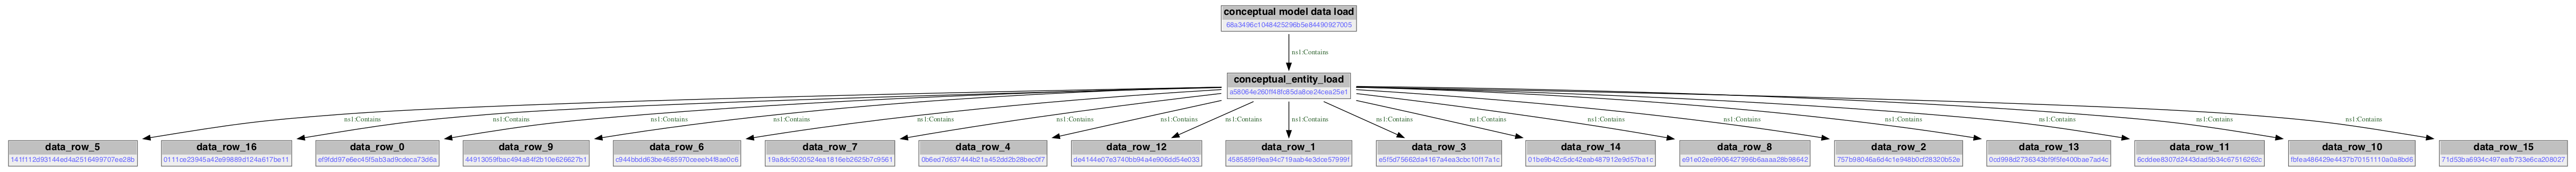

In [70]:
q = """
SELECT ?s ?p ?o
WHERE 

{
    {
        ?s a ?loadClasses .
        BIND (dm:MemberOf as ?m)
        BIND (dm:Contains as ?p)
        VALUES ?loadClasses { dm:JobNode dm:BatchNode}
        ?o ?m ?s .
    }
    UNION
    {
        ?s a ?loadClasses .
        BIND (dm:MemberOf as ?m)
        BIND (rdfs:label as ?p)
        VALUES ?loadClasses { dm:JobNode dm:BatchNode dm:RowNode}
        ?q ?m ?s .
        ?s ?p ?o .
    }
    
}
"""
#owlr.DeductiveClosure(onto).expand(row_g)
visualize(t2rdflibg(row_g.query(q)))

In [ ]:
# Find all items in the global graph that may already exist
# prior to performing an import of this batch's data
get_s_nodes="""
    SELECT ?s ?o
    WHERE
        {
        ?s dm:UniqueIdentifier ?o.
        }

    """

{v.value:k for k,v in list(row_g.query(get_s_nodes))}

In [ ]:
q =  """ SELECT ?s ?ls ?o ?lo
WHERE
{
    ?s dm:Contains ?o.
    ?o a dm:Context .
    ?s a dm:Context .
    ?s rdfs:label ?ls .
    ?o rdfs:label ?lo .
}"""

list(row_g.query(q))

In [ ]:
list(row_g.query(get_s_nodes))[0][0].toPython()

In [ ]:
print(row_g.serialize(format="xml").decode())